 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [50]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [51]:
whale_returns_path = Path("../Resources/whale_returns.csv")
algo_path = Path("../Resources/algo_returns.csv")
sp_path = Path("../Resources/sp_tsx_history.csv")

In [52]:
# Reading whale returns
whalereturns = pd.read_csv(whale_returns_path,index_col="Date", parse_dates=True)
whalereturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [53]:
# Count nulls
whalereturns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [54]:
# Drop nulls
whalereturns = whalereturns.dropna().copy()
whalereturns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [55]:
# Reading algorithmic returns
algoreturns = pd.read_csv(algo_path,index_col="Date", parse_dates=True)
algoreturns.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [56]:
# Count nulls
whalereturns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [57]:
# Drop nulls
algoreturns = algoreturns.dropna().copy()
algoreturns.dtypes

algoreturns


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [58]:
# Reading S&P TSX 60 Closing Prices
spreturns = pd.read_csv(sp_path,index_col="Date", parse_dates=True)

In [59]:
# Check Data Types
spreturns.dtypes

Close    object
dtype: object

In [60]:
# Fix Data Types
# getting rid of "$ and ," 
# convert values from object to float

spreturns["Close"] = spreturns["Close"].str.replace("$", "",regex=True)
spreturns["Close"] = spreturns["Close"].str.replace(",", "",regex=True)
spreturns["Close"] = spreturns["Close"].astype('float')


In [61]:
# Calculate Daily Returns
spreturns = spreturns.pct_change()

In [62]:
# Drop nulls
spreturns.isnull().sum()

Close    1
dtype: int64

In [63]:
# Rename `Close` Column to sp_tsx
spreturns = spreturns.dropna().copy()
newClose = {"Close": "sp_tsx"}
spreturns = spreturns.rename(columns = newClose)

# Double checking if there're null or N/A values
print(spreturns.isnull().sum())
print(spreturns.isna().sum())

sp_tsx    0
dtype: int64
sp_tsx    0
dtype: int64


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [64]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_returns = pd.concat([whalereturns,algoreturns,spreturns], axis="columns", join="inner")
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Returns of all Portfolios'}, xlabel='Date'>

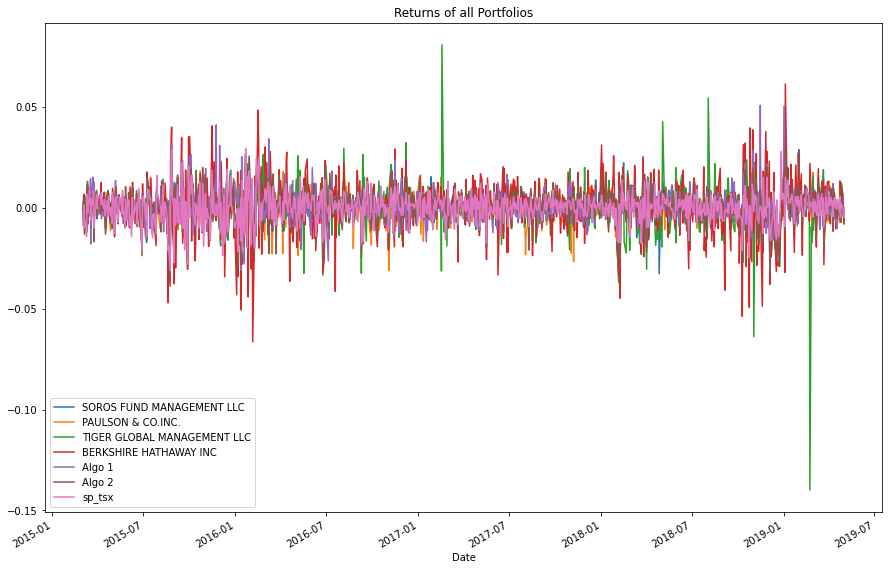

In [65]:
# Plot daily returns of all portfolios
all_returns.plot(figsize=(15, 10), title='Returns of all Portfolios')

#### Calculate and Plot cumulative returns.

In [66]:
# Calculate cumulative returns of all portfolios (storing cumulative returns data in daily_cr)
daily_cr = (1 + all_returns).cumprod()
# Plot cumulative returns
daily_cr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168
...,...,...,...,...,...,...,...
2019-04-25,1.118163,0.754821,0.840272,1.348932,2.011144,1.196390,1.070504
2019-04-26,1.127275,0.761736,0.850654,1.363007,2.017139,1.202677,1.072916
2019-04-29,1.128689,0.763808,0.855971,1.370126,2.027645,1.206080,1.072071


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

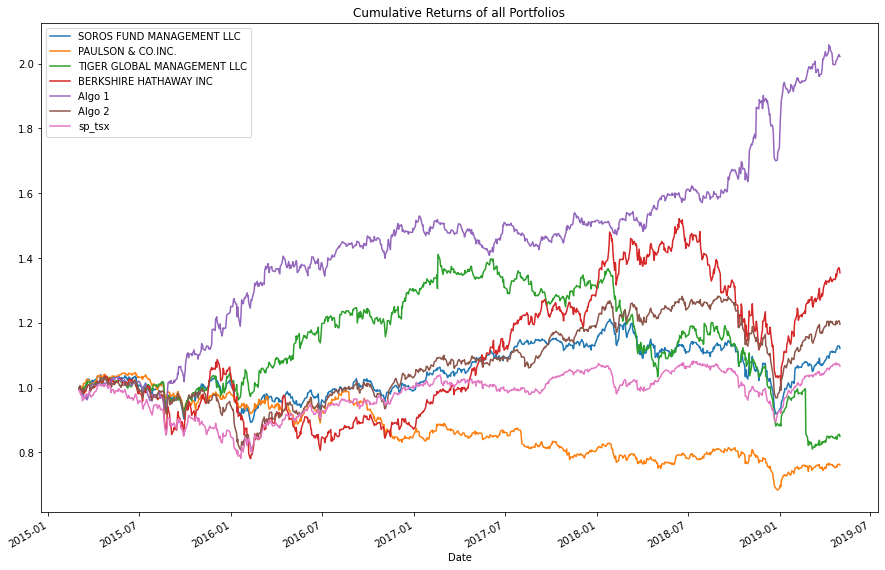

In [67]:
daily_cr.plot(figsize=(15, 10), title='Cumulative Returns of all Portfolios')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [68]:
#extract entire column headers(or portfolio's name)
portfolio_headers=list(all_returns)

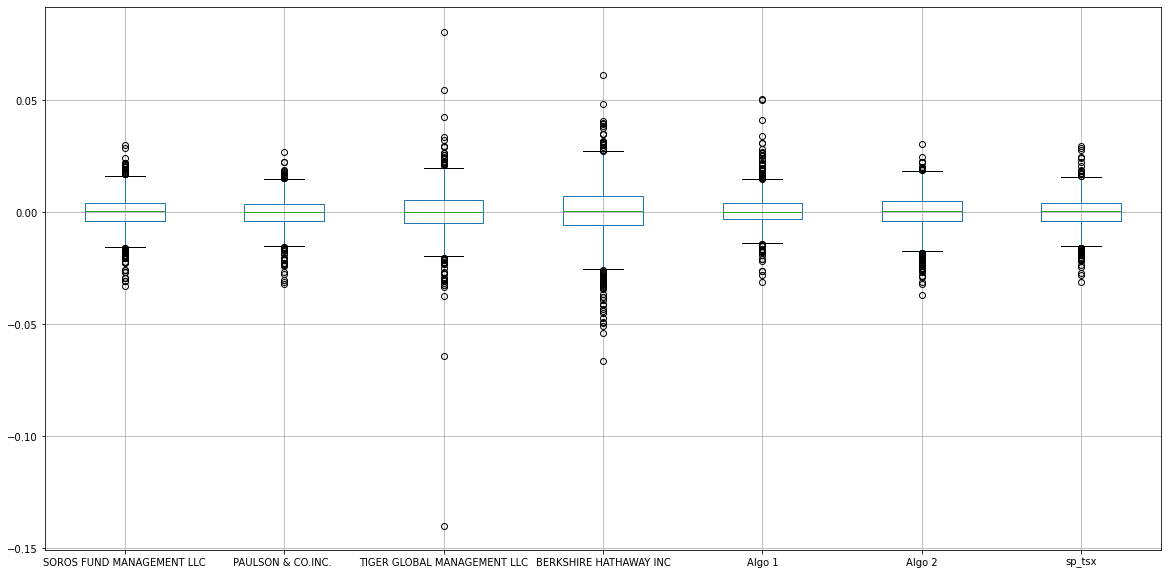

In [69]:
#plot boxplots
boxplot = all_returns.boxplot(figsize=(20, 10),column=portfolio_headers)

### Calculate Standard Deviations

In [70]:
# Calculate the daily standard deviations of all portfolios
all_std = all_returns.std()

### Determine which portfolios are riskier than the S&P TSX 60

In [71]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f"Standard Deviation of S&P TSX 60 is: {all_std['sp_tsx']:.5f}")

# Determine which portfolios are riskier than the S&P TSX 60
# for loop to go through every single portfolio's Standard Deviation

#termcolor to separate the riskier & less ricky portfolios
from termcolor import colored

for portfolio in portfolio_headers:
    if all_std[portfolio] > all_std['sp_tsx']:
        print(colored(f"Portfolio - {portfolio} ; SD - {all_std[portfolio]:.5f} ; Exposure - Riskier than S&P TSX 60",'red'))
    elif all_std[portfolio] < all_std['sp_tsx']:
        print(colored(f"Portfolio - {portfolio} ; SD - {all_std[portfolio]:.5f} ; Exposure - Less risky than S&P TSX 60",'green'))
    elif portfolio == 'sp_tsx':
        break
    elif all_std[portfolio] == all_std['sp_tsx']:
        print(colored(f"Portfolio - {portfolio} ; SD - {all_std[portfolio]:.5f} ; Exposure - Has equal risk than S&P TSX 60",'green'))

Standard Deviation of S&P TSX 60 is: 0.00703
Portfolio - SOROS FUND MANAGEMENT LLC ; SD - 0.00783 ; Exposure - Riskier than S&P TSX 60
Portfolio - PAULSON & CO.INC.  ; SD - 0.00698 ; Exposure - Less risky than S&P TSX 60
Portfolio - TIGER GLOBAL MANAGEMENT LLC ; SD - 0.01088 ; Exposure - Riskier than S&P TSX 60
Portfolio - BERKSHIRE HATHAWAY INC ; SD - 0.01283 ; Exposure - Riskier than S&P TSX 60
Portfolio - Algo 1 ; SD - 0.00759 ; Exposure - Riskier than S&P TSX 60
Portfolio - Algo 2 ; SD - 0.00833 ; Exposure - Riskier than S&P TSX 60


### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = all_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx                         0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling SD for all Portfolios with 21-day Window'}, xlabel='Date'>

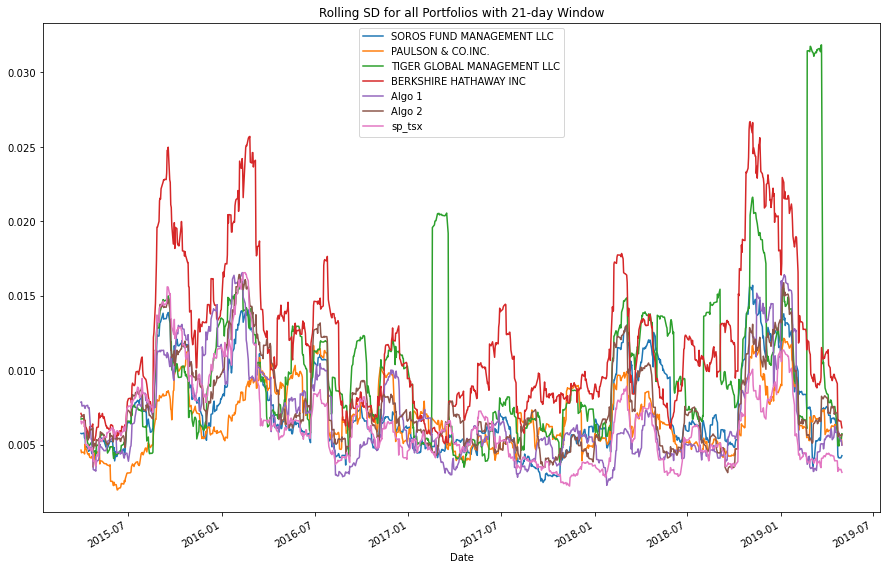

In [73]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_returns.rolling(window=21).std().plot(figsize=(15, 10), title='Rolling SD for all Portfolios with 21-day Window')

### Calculate and plot the correlation

Algo 2 seems to mimic S&P 60 TSX


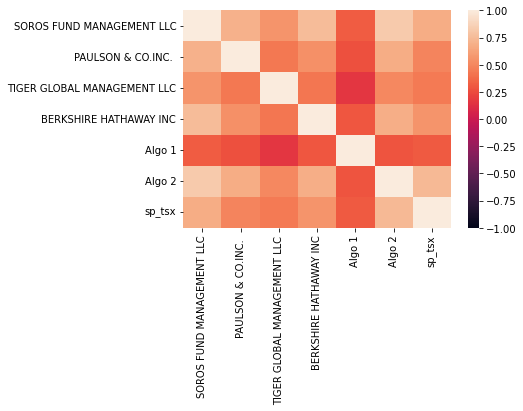

In [74]:
# Calculate the correlation
correlation = all_returns.corr()
# Display de correlation matrix
correlation.head(7)

sns.heatmap(correlation, vmin=-1, vmax=1)

print("Algo 2 seems to mimic S&P 60 TSX")

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [75]:
# Calculate covariance of a single portfolio - PAULSON & CO.INC
covariance_paulson = all_returns['PAULSON & CO.INC. '].cov(all_returns['sp_tsx'])
print(f"Covariance of Paulson & CO.INC: {covariance_paulson:.7f}")
# Calculate variance of S&P TSX
variance_sptsx = all_returns['sp_tsx'].var()
print(f"Variance of S&P TSX: {variance_sptsx:.7f}")
# Computing beta
paulson_beta = covariance_paulson / variance_sptsx
print(f"Beta of Paulson & CO.INC: {paulson_beta:.7f}")

Covariance of Paulson & CO.INC: 0.0000239
Variance of S&P TSX: 0.0000495
Beta of Paulson & CO.INC: 0.4829254


<AxesSubplot:title={'center':'Rolling 21-days Beta of PAULSON & CO.INC. '}, xlabel='Date'>

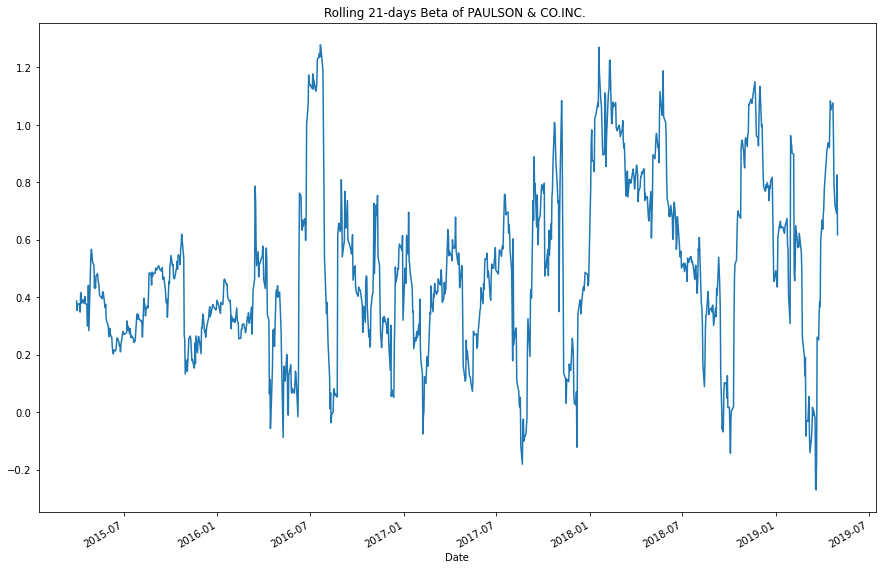

In [76]:
# Plot beta trend
rolling_covariance = all_returns['PAULSON & CO.INC. '].rolling(window=21).cov(all_returns['sp_tsx'])
rolling_variance = all_returns['sp_tsx'].rolling(window=21).var()

rolling_beta = rolling_covariance / rolling_variance

rolling_beta.plot(figsize=(15, 10), title='Rolling 21-days Beta of PAULSON & CO.INC. ')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [77]:
# Use `ewm` to calculate the rolling window
ewm_all_returns = all_returns.ewm(halflife=21,min_periods=0,adjust=True,ignore_na=False).mean()

ewm_all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.005908
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.003410
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005133
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.005436
...,...,...,...,...,...,...,...
2019-04-25,0.001277,0.000032,-0.001058,0.001860,0.000625,0.000876,0.001018
2019-04-26,0.001500,0.000329,-0.000622,0.002138,0.000702,0.001018,0.001058
2019-04-29,0.001492,0.000406,-0.000399,0.002238,0.000848,0.001077,0.000998


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [78]:
# Annualized Sharpe Ratios
sharpe_ratios = ((all_returns.mean()) * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
sp_tsx                         0.195550
dtype: float64

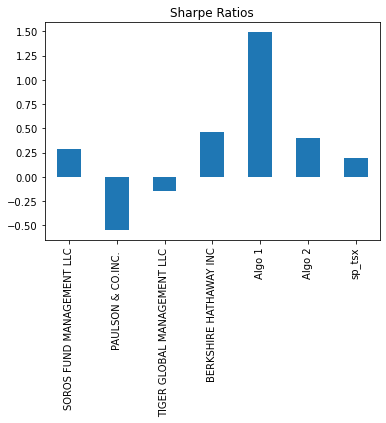

In [79]:
# Visualize the sharpe ratios as a bar plot
fig = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

#### Answer: Algo 1 did beat both the market and the whale portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [84]:
# Reading data from ASX:CSL
# Reading data from ASX:COH
# Reading data from ASX:IPL
# Reset Date index
# Reorganize portfolio data by having a column per symbol

fb_path = Path("../Resources/fb_historical.csv")
google_path = Path("../Resources/google_historical.csv")
tesla_path = Path("../Resources/tesla_historical.csv")

In [85]:
#create function that: 
# 1) takes input of stock's data path AND our desired column name to replace "Close"
# 2) Deletes Symbol column

#function code
def tidydata(stockpath,columnname):

#reads data
    data = pd.read_csv(stockpath, index_col="Date", infer_datetime_format=True,parse_dates=True)

#Renaming column's header
    data["Close"] = data["Close"].astype('float')
    newClose = {"Close": columnname}
    data = data.rename(columns = newClose)

#deletes Symbol Column
    data = data.drop(columns=["Symbol"])
    
#pd.concat requires that the indices be unique.
#To remove rows with duplicate indices, we use
    data = data.loc[~data.index.duplicated(keep='first')]
    return data

#calls function to store data in respective elements
fb_data = tidydata(fb_path,"FB")
google_data = tidydata(google_path,"GOOGL")
tesla_data = tidydata(tesla_path,"TSLA")

In [86]:
# Combine all stocks in a single DataFrame
stocks_closing = pd.concat([fb_data,google_data,tesla_data], axis="columns", join="inner")
stocks_closing

,FB,GOOGL,TSLA
Date,,,
2015-01-02,78.45,529.55,78.45
2015-01-05,77.19,519.46,77.19
2015-01-06,76.15,506.64,76.15
2015-01-07,76.15,505.15,76.15
2015-01-08,78.18,506.91,78.18
...,...,...,...
2022-02-23,198.45,2551.76,198.45
2022-02-24,207.60,2653.82,207.60
2022-02-25,210.48,2689.19,210.48


In [87]:
# Calculate daily returns
stocks_returns = stocks_closing.pct_change()

stocks_returns.head()

,FB,GOOGL,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.016061,-0.019054,-0.016061
2015-01-06,-0.013473,-0.024679,-0.013473
2015-01-07,0.000000,-0.002941,0.000000
2015-01-08,0.026658,0.003484,0.026658


In [88]:
# Drop NAs
stocks_returns=stocks_returns.dropna().copy()
# Display sample data
stocks_returns

,FB,GOOGL,TSLA
Date,,,
2015-01-05,-0.016061,-0.019054,-0.016061
2015-01-06,-0.013473,-0.024679,-0.013473
2015-01-07,0.000000,-0.002941,0.000000
2015-01-08,0.026658,0.003484,0.026658
2015-01-09,-0.005628,-0.012211,-0.005628
...,...,...,...
2022-02-23,-0.017963,-0.017144,-0.017963
2022-02-24,0.046107,0.039996,0.046107
2022-02-25,0.013873,0.013328,0.013873


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [90]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_returns = weights[0] * stocks_returns["FB"] + weights[1] * stocks_returns["GOOGL"] + weights[2] * stocks_returns["TSLA"]  

# Display sample data

myportfolio_returns.head()

Date
2015-01-05   -0.017059
2015-01-06   -0.017209
2015-01-07   -0.000980
2015-01-08    0.018933
2015-01-09   -0.007822
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [91]:
# Join your returns DataFrame to the original returns DataFrame
final_data = pd.concat([all_returns,myportfolio_returns], axis="columns",join="inner")
final_data = final_data.rename(columns = {0: "My Portfolio"})

final_data

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530,0.000932
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371,0.010623
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344,0.004341
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972,-0.014741
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555,-0.004051
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.040925
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,-0.003455
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788,0.016355


In [92]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_data = final_data.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [93]:
# Calculate the annualized `std`
new_annualized_std = final_data.std() * np.sqrt(252)
new_annualized_std.head(8)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx                         0.111664
My Portfolio                   0.248407
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling SD for all Portfolios with 21-day Window'}, xlabel='Date'>

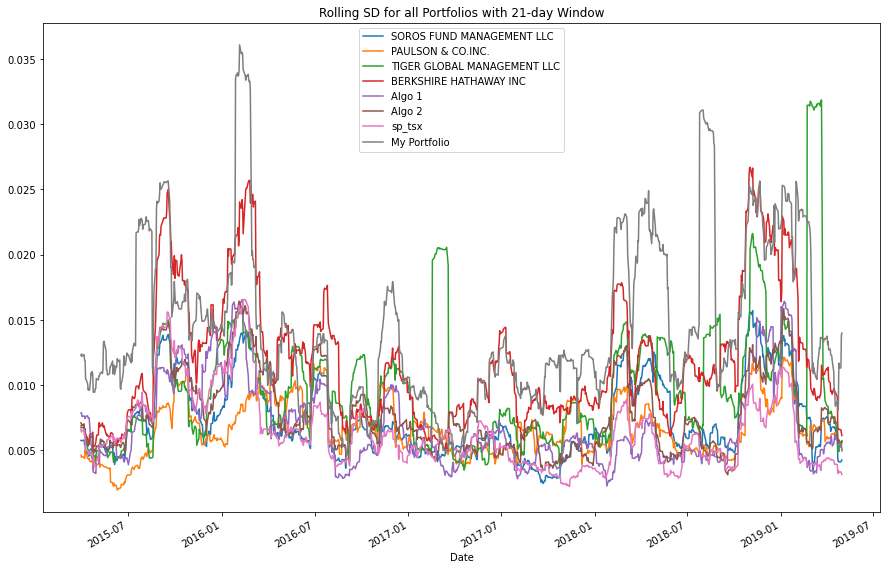

In [94]:
# Calculate rolling standard deviation
new_rolling_SD = final_data.rolling(window=21).std()
# Plot rolling standard deviation
new_rolling_SD.plot(figsize=(15, 10), title='Rolling SD for all Portfolios with 21-day Window')

### Calculate and plot the correlation

(<AxesSubplot:>, <AxesSubplot:xlabel='My Portfolio', ylabel='sp_tsx'>)

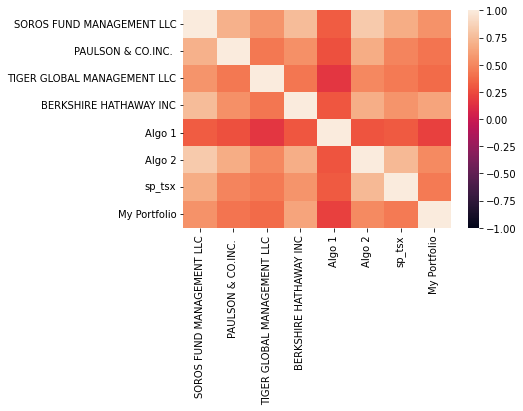

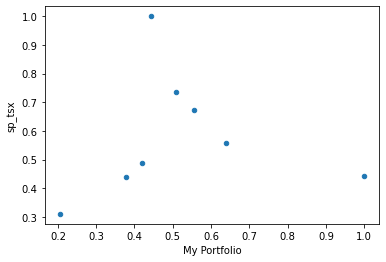

In [111]:
# Calculate and plot the correlation
new_correlation = final_data.corr()


sns.heatmap(new_correlation, vmin=-1, vmax=1),new_correlation.plot(kind="scatter", x="My Portfolio", y="sp_tsx")

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-days Beta of My Portfolio'}, xlabel='Date'>

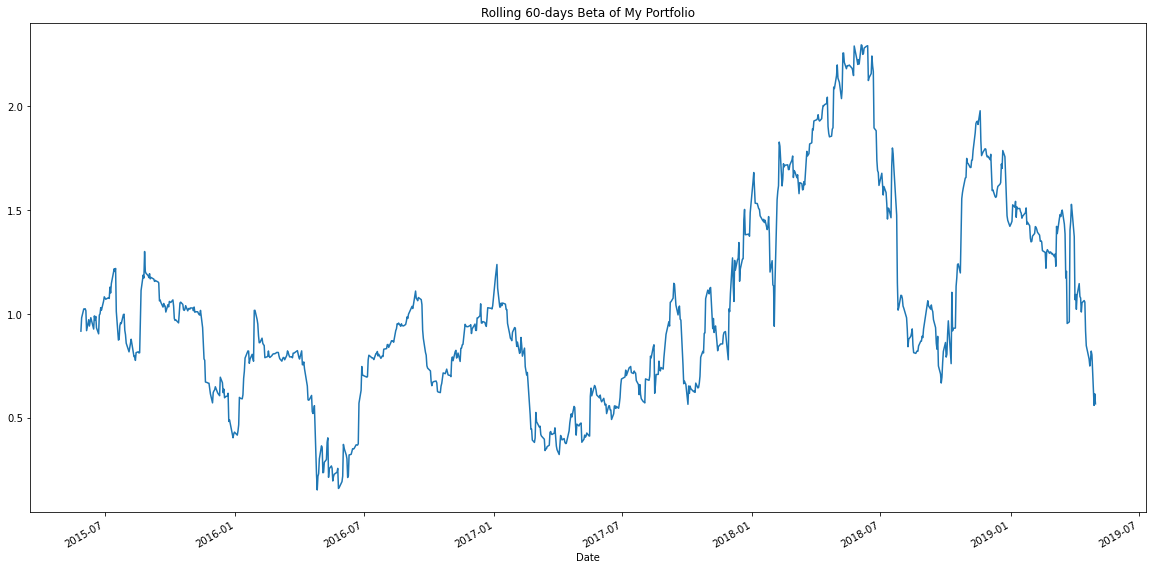

In [112]:
# Calculate and plot Beta
new_rolling_covariance = final_data['My Portfolio'].rolling(window=60).cov(final_data['sp_tsx'])
new_rolling_variance = final_data['sp_tsx'].rolling(window=60).var()

new_rolling_beta = new_rolling_covariance / new_rolling_variance

new_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-days Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Calculate Annualized Sharpe Ratios
final_sharpe_ratios = ((final_data.mean().mean()) * 252) / (final_data.std() * np.sqrt(252))
final_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.498986
PAULSON & CO.INC.              0.559391
TIGER GLOBAL MANAGEMENT LLC    0.358902
BERKSHIRE HATHAWAY INC         0.304537
Algo 1                         0.514681
Algo 2                         0.469095
sp_tsx                         0.555268
My Portfolio                   0.249605
dtype: float64

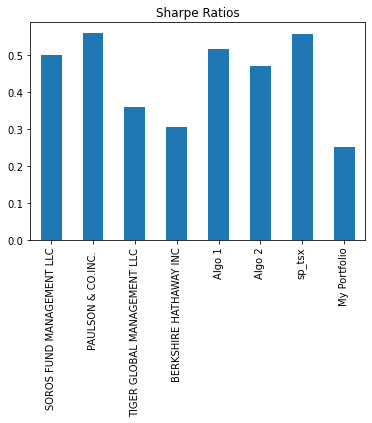

In [114]:
# Visualize the sharpe ratios as a bar plot
fig2 = final_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [115]:
new_annualized_std.head(8)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx                         0.111664
My Portfolio                   0.248407
dtype: float64

In [116]:
print(f'My Portfolio has a sharpe ratio of {final_sharpe_ratios["My Portfolio"]:.4f}, which is considered sub-optimal (according to investopedia since it is less than 1). Not to mention that it has a higher SD(more volatility) than every single portfolio.')

My Portfolio has a sharpe ratio of 0.2496, which is considered sub-optimal (according to investopedia since it is less than 1). Not to mention that it has a higher SD(more volatility) than every single portfolio.
